# Unit 1 (Python) Project

## Problem Statement:
Using the [NY Times covid data](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv) (https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv) create a US Wide level epidmic curve.

The epidemic curve should be a chart that contains:

- A bar chart with the count of new cases for each day
- A line plot on top with a 14 day moving average

Here is an example of what your finished chart should look like:

![NY Times Epidemic Curve Screenshot](https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/EpiCurveExample.png)


In addition to the country level curve create the epidemic curve for three states.  Make sure that that code can be easily converted to create the curve for any individual state.

One of the primary problems with the epidemic curves is that they only provide a single view of the data, they don't correct for obvious confounding factors such as population.  It is obvious that the total case count for California should not be directly compared to the raw case counts for Wyoming.  The standard adjustment is the cases per 100,000 people.  (To computer this value you divide the case rate by the population and multiply that number by 100,000.) You will need to download the population numbers from [https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv](https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv).  This file was pulled from the US Census and contains projected population numbers for each county in the the US up through 2019.  Use the 2019 numbers for this comparison.  The documentation and data descrption for this file is at: [https://github.com/statuser/MBA656AWebsite/raw/master/Unit%201%20Project/co-est2019-alldata.pdf](https://github.com/statuser/MBA656AWebsite/raw/master/Unit%201%20Project/co-est2019-alldata.pdf)

Create a plot that compares the adjusted case rate for all the states.  This should be the cumulative number of cases at the current time in the data set.  

Also create a plot that compares the adjusted death rate for all the states.  This should be the cumulative number of deaths as well.  

Finally create a plot that compares the case rate to the death rate.  Are there any outliers?  Any states that preform especially well or especially poorly.  This creates a jumping off point for a more involved prject that looks at the causes of different death rates as well as an investigation into why different states have experienced COVID in different ways.

### Learning Objectives

This assignment is designed to be a comprehensive evaluation of the first Unit on Programming in Python.  It has a number of interesting challenges that will test your ability to think computationally and solve probelms in a creative way.  

For example, the data from the NY Times is presented as cumulative data.  You will need to reconstruct the daily case counts from this data file.

You will also need to clean the population data since it contains man fields that are not necessary.  You will also be merging and rescaling data.

You have already written some of the code that will be useful in a previous assignment so thinking about code reuse and encapsulation will also be useful.

Recall that there are three components of a successful programmer:

1. Domain Expertise
2. Computational Thinking
3. Knowledge of Syntax and Libraries

This project is meant to exercise all three aspects.

### Deliverables

Please turn in a copy of this Jupyter Notebook with all the fields field in and the code correctly run. Make sure that you load the data from the URL's provided instead of from local files that you downloaded.  That way the code can be rerun without adjusting paths or tracking down missing files.

The questions are not all weighted equally.  In fact the mjority of the work is contained in the prepatory work section which is not associated with any particular question.  For the open ended response please provide enough details to ensure that we understand your answers and demonstrates that thought you put into those questions.  One or two sentence answers are problem not sufficient for any of the questions.

## Problem 1 - (Demonstrate Domain Expertise)

Please restate the problem in your own words. (The purpose of this is to make sure you understand the data request and the problem statement and deliverables.  You should be creating 7 final charts although you may need to create some intermediate plots to understand the process.)



## Problem 1 Response

> Responses will vary.  They should identify the need to download the data files, clean and restructure them, and create 7 plots.

## Problem 2 - (Develop deeper domain expertise)

Before we can write some psuedo-code to solve the specific problem, it is useful to do some exploration of the data files and preliminary cleaning.  The goal of this is to identify the data that we will need to use as well as understand any transformation or data deficiencies that exist.  There is not any specific deliverables for this problem, but after this exercise you should have two data files that contain the data that you need to complete the assignment.  You should only be exploring and doing basic cleaning at this point.  We will save transforming and summarizing the data until after you have written your psuedo-code.

In [39]:
# Python code to import the two data files, examine them, and filter out unnecessary columns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 5)

covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'], index_col='date')
population_data = pd.read_csv('https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv', encoding='latin1', usecols=['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'POPESTIMATE2019'], index_col='STNAME', dtype={'STATE': 'object', 'COUNTY' : 'object'})

population_data.head()


,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,POPESTIMATE2019
STNAME,,,,,,,
Alabama,40,3,6,01,000,Alabama,4903185
Alabama,50,3,6,01,001,Autauga County,55869
Alabama,50,3,6,01,003,Baldwin County,223234
Alabama,50,3,6,01,005,Barbour County,24686
Alabama,50,3,6,01,007,Bibb County,22394


In [40]:
covid_data.dtypes

state     object
fips       int64
cases      int64
deaths     int64
dtype: object

## Problem 3 - (Computational Thinking)

Write psudo-code for the assignment.  Think carefully about what you need to accomplish and what steps you need to take in which order in order to accomplish that task.

## Problem 3 Response

> Responses wil vary.  The code needs to:
>
> 1. Convert cumulative cases and deaths to daily counts
> 2. Compute the 14-day moving average
> 3. Merge in the state level population data
> 4. Compute population adjusted cases and deaths
> 5. Summarize population adjusted numbers by state for final chart
>
> Create graphs:
> - Country level epi-chart
> - Function for state level epi-chart
> - Call function for Utah, New York, New Mexico
> 
> Plot Population Level Cases
> Plot Population Level Deaths
> Create scatter plot for population level case by deaths

## Preparatory work

Write the code to clean and transform the data files so that the plots can be easily created. 

In [41]:
# A couple of hints: 
# Remove Guam, Virgin Islands, Puerto Rico, Northern Mariana Islands since we don't have population data
covid_data = covid_data.query('state not in ["Guam", "Virgin Islands", "Puerto Rico", "Northern Mariana Islands"]')
# You can compute daily data by subtracting each days count from the previous days count.  The shift 
# function will be helpful for this
# Solution 1

# new column that shifts old column by one place
def compute_daily(column):
    temp = column.shift(fill_value = 0)
    return column.sub(temp)

covid_data['daily_cases'] = covid_data.groupby('state')['cases'].transform(compute_daily)
covid_data['daily_deaths'] = covid_data.groupby('state')['deaths'].transform(compute_daily)


# state_data[['daily_cases', 'daily_deaths']] = (
#     state_data.groupby('state')[['cases', 'deaths']]
#     .transform( compute_daily )
# )

# Solution 2 - better
# covid_data[['daily_cases', 'daily_deaths']] = (
#     covid_data.groupby('state')[['cases', 'deaths']]
#     .transform( lambda column: column.sub(column.shift(fill_value = 0)) )
# )

covid_data.head()

,state,fips,cases,deaths,daily_cases,daily_deaths
date,,,,,,
2020-01-21,Washington,53,1,0,1,0
2020-01-22,Washington,53,1,0,0,0
2020-01-23,Washington,53,1,0,0,0
2020-01-24,Illinois,17,1,0,1,0
2020-01-24,Washington,53,1,0,0,0


In [42]:
# This causes some of the daily totals to be less than 0.  For the 
# Epi-curve this is obviously bad data so let's set those values to be missing
covid_data['daily_cases'].mask(covid_data['daily_cases'] < 0, inplace=True)
covid_data['daily_deaths'].mask(covid_data['daily_deaths'] < 0, inplace=True)

In [43]:
# The population file has both county level and state level data.  We only need the state level data.  
population_data = population_data.query("COUNTY == '000'")
population_data.drop(['STATE', 'COUNTY', 'SUMLEV', 'CTYNAME'], axis = 1, inplace=True)
# The county code is 000 for the state level data.
population_data.head()

,REGION,DIVISION,POPESTIMATE2019
STNAME,,,
Alabama,3,6,4903185
Alaska,4,9,731545
Arizona,4,8,7278717
Arkansas,3,7,3017804
California,4,9,39512223


In [44]:
merged_data = covid_data.reset_index()
merged_data = merged_data.merge(population_data, how='left', left_on='state', right_on='STNAME')
merged_data = merged_data.set_index('date')


In [45]:
merged_data.head()

,state,fips,cases,deaths,daily_cases,daily_deaths,REGION,DIVISION,POPESTIMATE2019
date,,,,,,,,,
2020-01-21,Washington,53,1,0,1.0,0.0,4,9,7614893
2020-01-22,Washington,53,1,0,0.0,0.0,4,9,7614893
2020-01-23,Washington,53,1,0,0.0,0.0,4,9,7614893
2020-01-24,Illinois,17,1,0,1.0,0.0,2,3,12671821
2020-01-24,Washington,53,1,0,0.0,0.0,4,9,7614893


In [46]:
# Compute the moving average
merged_data['moving_cases'] = merged_data.groupby('state')['daily_cases'].transform(lambda s: s.rolling(14, 1).mean())
merged_data['moving_deaths'] = merged_data.groupby('state')['daily_deaths'].transform(lambda s: s.rolling(14, 1).mean())
merged_data.head()

,state,fips,cases,deaths,daily_cases,daily_deaths,REGION,DIVISION,POPESTIMATE2019,moving_cases,moving_deaths
date,,,,,,,,,,,
2020-01-21,Washington,53,1,0,1.0,0.0,4,9,7614893,1.000000,0.0
2020-01-22,Washington,53,1,0,0.0,0.0,4,9,7614893,0.500000,0.0
2020-01-23,Washington,53,1,0,0.0,0.0,4,9,7614893,0.333333,0.0
2020-01-24,Illinois,17,1,0,1.0,0.0,2,3,12671821,1.000000,0.0
2020-01-24,Washington,53,1,0,0.0,0.0,4,9,7614893,0.250000,0.0


# Problem 4 - (Syntax and Libraries)

Create the epidemic curve for the country

Text(0.5, 1.0, 'US Coronavirus Cases and 14-day Moving Average')

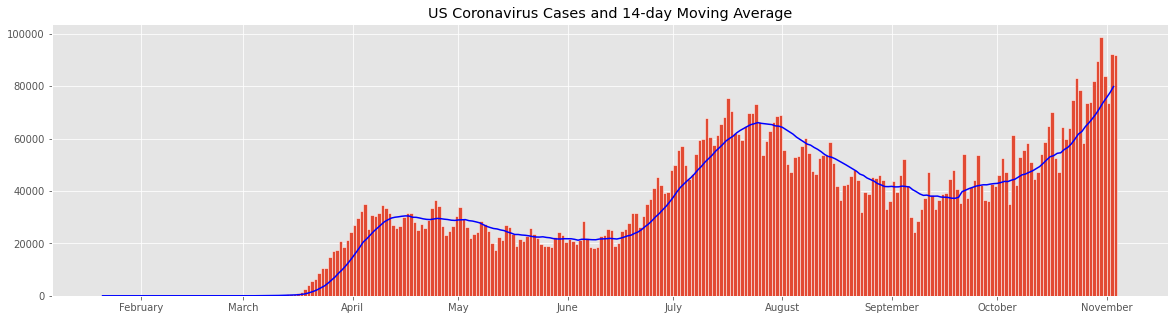

In [47]:
# Graph should appear here
import matplotlib.dates as mdates

months = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%B')

us_data = merged_data.groupby('date').sum()

ax = plt.axes()
plt.bar(us_data.index, us_data.daily_cases, width=1, align='edge', edgecolor='white')
plt.plot(us_data.index, us_data.moving_cases, color='blue')


ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)
plt.title('US Coronavirus Cases and 14-day Moving Average')


## Problem 5 - (Syntax and Libraries)

Create the three state epidemic curves

In [48]:
# Function to create a state plot here
def create_state_curve(state):
    state_data = merged_data.query('state == "{state}"'.format(state = state))
    # Create the plot
    ax = plt.axes()
    plt.bar(state_data.index, state_data.daily_cases, width=1, align='edge')
    plt.plot(state_data.index, state_data.moving_cases, color='blue')

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    plt.title('{state} Coronavirus Cases and 14-day Moving Average'.format(state=state))
    

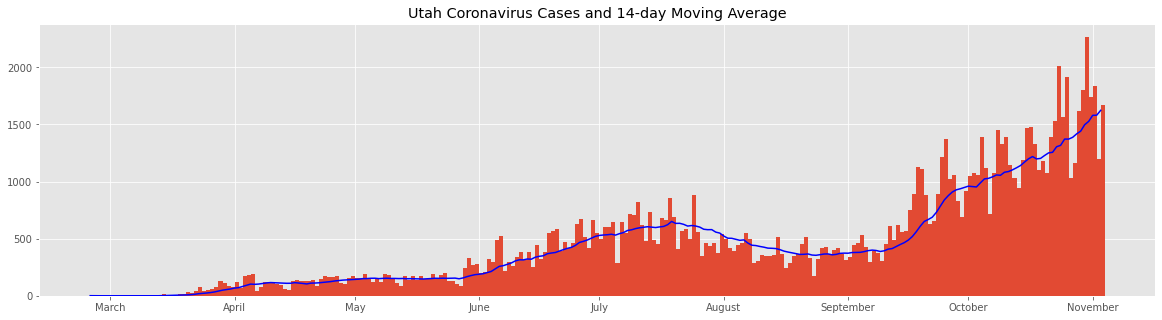

In [49]:
# Call function for first state plot
create_state_curve("Utah")

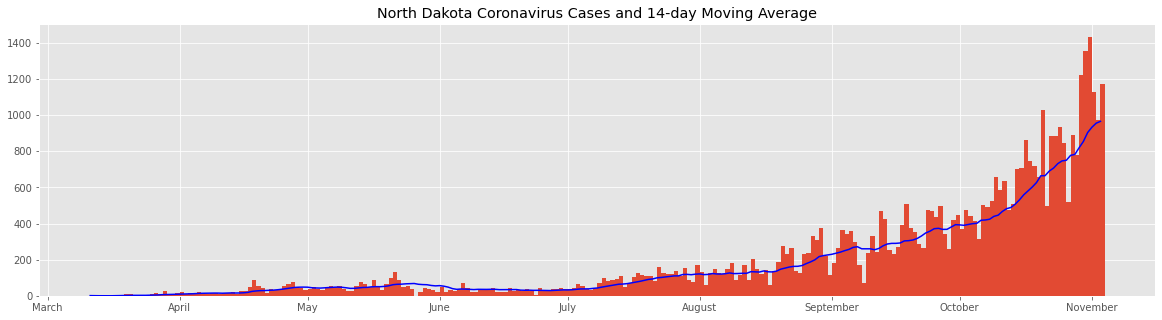

In [50]:
# Call function for second state plot
create_state_curve("North Dakota")

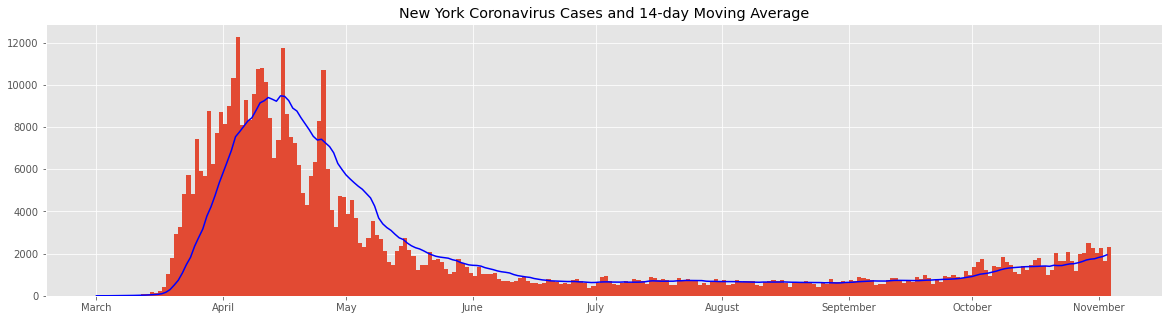

In [51]:
# Call function for third state plot
create_state_curve("New York")

## Problem 6 - (Syntax and Libraries)

Create the plot for the population adjusted case rates

<AxesSubplot:xlabel='state'>

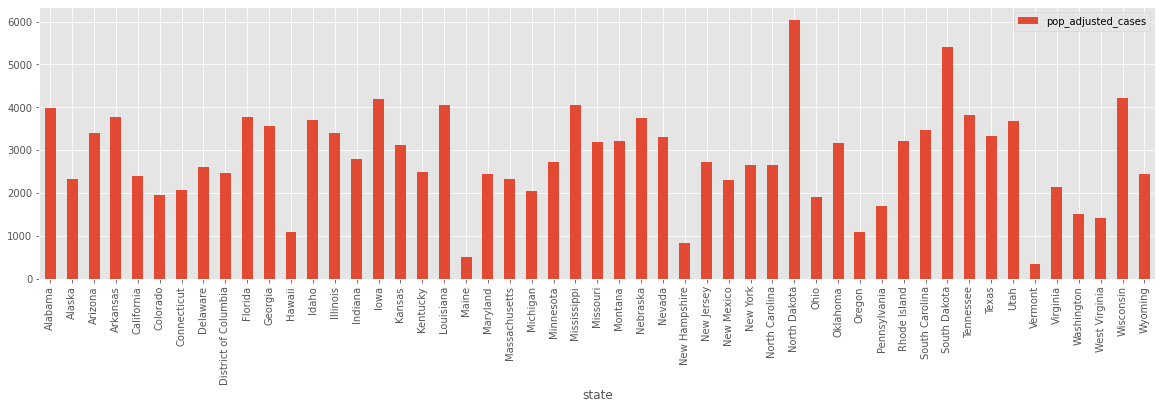

In [56]:
# Graph should appear here
import numpy as np
nov_2nd = np.datetime64('2020-11-02')

nov_2nd_data = merged_data[merged_data.index == nov_2nd].copy()

nov_2nd_data['pop_adjusted_cases'] = nov_2nd_data.cases/nov_2nd_data.POPESTIMATE2019*100000
nov_2nd_data['pop_adjusted_deaths'] = nov_2nd_data.deaths/nov_2nd_data.POPESTIMATE2019*100000


nov_2nd_data.plot.bar(x = 'state', y = 'pop_adjusted_cases')

## Problem 7 - (Syntax and Libraries)

Create the plot for the population adjusted death rates

<AxesSubplot:xlabel='state'>

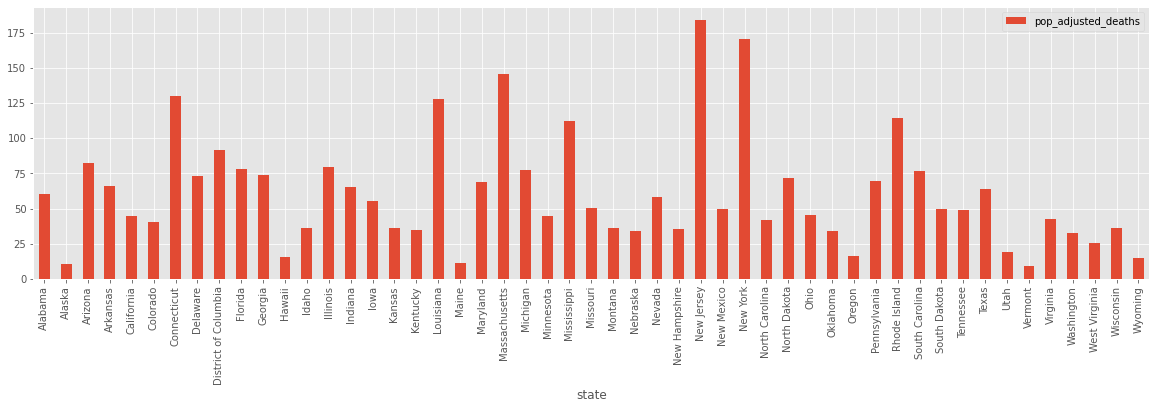

In [57]:
# Graph should appear here
nov_2nd_data.plot.bar(x = 'state', y = 'pop_adjusted_deaths')

## Problem 8 - (Syntax and Libraries)

Create the scatter plot comparing the population adjusted case and death rates

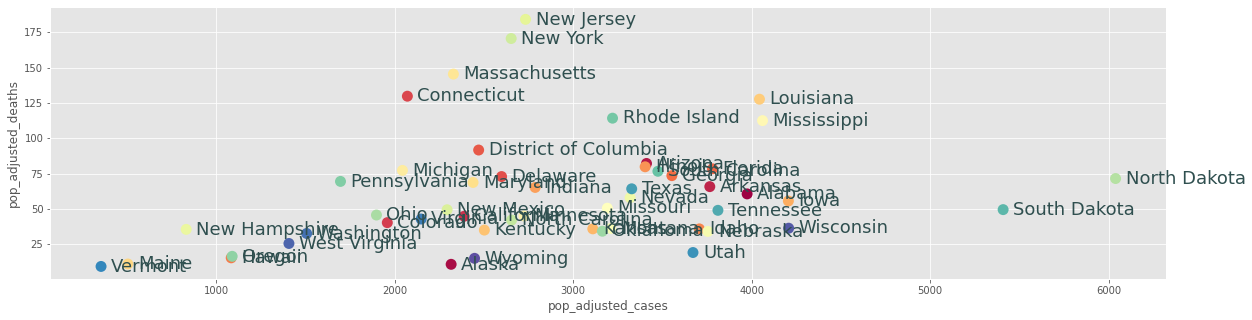

In [79]:
# Graph should appear here
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

nov_2nd_data = nov_2nd_data.reset_index()[['state', 'pop_adjusted_cases', 'pop_adjusted_deaths']].set_index('state')

fig, ax = plt.subplots()
nov_2nd_data.plot(x = 'pop_adjusted_cases', y = 'pop_adjusted_deaths', kind='scatter', ax=ax, s=120, linewidth=0, 
         c=range(len(nov_2nd_data)), colormap=cmap)

for k, v in nov_2nd_data.iterrows():
     ax.annotate(k, v,
                 xytext=(10,-5), textcoords='offset points',
                 family='sans-serif', fontsize=18, color='darkslategrey')

fig.canvas.draw()

## Problem 9 - (Demonstrate Domain Expertise)

What stands out to you about this plot?  What would you like to investigate further?  How are you identifying the individual states that are worth investigating.  County level rates and populations are also available. How might this data be used to address some of the pressing questions about the pandemic?

## Problem 9 Response

> Put answers here

## Problem 10 - (Domain Expertise combined with Computation Thinking)

What additional questions did this exercise surface?  How would you go about addressing these questions?  What additional data would you need?  The great news is that tons of data is available already.  The NY Times has made all their COVID data available including data from surveys on things like mask usage, state lockdown policies, and attitudes about the virus and the response to the virus.

## Problem 10 Response
> Put answers here